<h1 align='center'> 영상처리 프로그래밍 실습 12</h1>

<h6 align='right'> 2022. 6. 7. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 6월 13일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


In [2]:
import cv2.dnn

## 지난 주 문제 1. 
 
다음 조건을 만족하는 프로그램을 작성하라.


1. 화면에 검은색 화면을 표시하는 창을 표시하고, OpenCV의 마우스 이벤트 처리 기능을 이용해서 마우스가 움직이는 궤적을 흰색으로 표시하라. 단, 마우스 궤적에 따라 선을 그릴 수 있는 영역의 크기는 MNIST handwritten digits 영상 크기인 28 x 28의 배수로 선택하라. (예: 280 x 280)
2. 왼쪽 마우스 버튼을 누른 상태에서 마우스를 움직일 때만 곡선이 그려진다.
3. 키보드에서 'c'를 누르면 화면이 지워진다.
4. 키보드에서 'q'를 누르면 프로그램이 종료된다.
5. 가장 가까운 글자 K 개를 화면에 표시한다.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mnist
from sklearn.neighbors import KNeighborsClassifier


def onThickness(val):
    global pen_thickness
    pen_thickness = val
    
    
def onDraw(event, x, y, flags, params):
    global pts, idx, drawing, canvas, canvas_extended, text_pane
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts.append((x,y))
        idx = 0
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            pts.append((x,y))
            idx += 1
            cv2.line(canvas, pts[idx-1], pts[idx], color, pen_thickness)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        pts = []
    elif event == cv2.EVENT_RBUTTONUP:
        canvas = cv2.GaussianBlur(canvas, KERNEL_SIZE, sigmaX)
        digit = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
        digit = cv2.resize(digit, (HEIGHT, WIDTH))
        predict = knn.predict(digit.reshape(1, HEIGHT*WIDTH))[0]
        text_pane = np.ones_like(canvas) * 128
        show_kNN(digit)
        cv2.putText(text_pane, str(predict), (90, 220), cv2.FONT_HERSHEY_DUPLEX, 5, (0,0,255), 3)
        canvas_extended = np.hstack((canvas, text_pane))
        cv2.imshow(winName, canvas_extended)

    canvas_extended = np.hstack((canvas, text_pane))
    cv2.imshow(winName, canvas_extended)


def show_kNN(digit):
    global text_pane
    
    kneighbors_idx = knn.kneighbors(digit.reshape(1, HEIGHT*WIDTH))[1][0]
    print(kneighbors_idx)
    kneighbors_images = train_images[kneighbors_idx]
    kimg = kneighbors_images[0].reshape(HEIGHT, WIDTH)
    for img_t in kneighbors_images[1:]:
        kimg = np.hstack((kimg, img_t.reshape(HEIGHT, WIDTH)))
    kimg = cv2.cvtColor(kimg, cv2.COLOR_GRAY2BGR)
    kh,kw,kd = kimg.shape
    fx = text_pane.shape[1] / kw
    kimg = cv2.resize(kimg, None, fx=fx, fy=fx)
    text_pane[:kimg.shape[0],:,:] = kimg

    
drawing = False
color = (253, 253, 253)
pts = []
idx = -1
SCALE = 10
#WIDTH, HEIGHT = 28, 28
KERNEL_SIZE = (9,9)
sigmaX = 4

train_images = mnist.train_images()
train_labels = mnist.train_labels()
K = 5
WIDTH, HEIGHT = train_images.shape[1:]

knn = KNeighborsClassifier(n_neighbors=K)
train_images.shape = (train_images.shape[0], -1)
knn.fit(train_images, train_labels)


pen_thickness = 10

canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE, 3), np.uint8)
text_pane = np.ones_like(canvas) * 128
cv2.putText(text_pane, '?', (90, 220), cv2.FONT_HERSHEY_DUPLEX, 5, (0,0,255), 3)

canvas_extended = np.hstack((canvas, text_pane))
winName = 'Digit Recognition'
cv2.namedWindow(winName, flags = cv2.WINDOW_AUTOSIZE | cv2.WINDOW_GUI_NORMAL)

cv2.imshow(winName, canvas_extended)
cv2.setMouseCallback(winName, onDraw)

cv2.createTrackbar('thickness', winName, pen_thickness, 50, onThickness)
cv2.setTrackbarMin('thickness', winName, 15)


while True:
    key_in = cv2.waitKey()
    if key_in == ord('q'):
        break
    elif key_in == ord('c'):
        canvas = np.zeros((HEIGHT*SCALE, WIDTH*SCALE, 3), np.uint8)
        text_pane = np.ones_like(canvas) * 128
        cv2.putText(text_pane, '?', (90, 220), cv2.FONT_HERSHEY_DUPLEX, 5, (0,0,255), 3)

        canvas_extended = np.hstack((canvas, text_pane))
        cv2.imshow(winName, canvas_extended)
        
cv2.destroyAllWindows()


[33469   866 40598 30872 16479]
[17853 37517 23700 42391 31791]


## 예제 1.

OpenCV의 유사 하르 캐스캐이드 (Haar-like cascade) 분류기를 이용해서 얼굴 검출 프로그램을 만들려고 한다.

### 1.1

다음 조건을 만족하는 프로그램을 작성하라.


1. 'test_01.jpg' 영상을 읽고, 화면의 크기를 폭이 1280이 되도록 영상의 크기를 조절하라.
2. OpenCV에서 제공하는 얼굴 검출 용 XML 파일 세 개의 성능을 비교할 수 있도록 세 개를 선택할 수 있는 trackbar interface를 제공한다.
3. 검출된 얼굴 부위를 표시하는 사각형을 입력 영상에 표시한다.
4. 키보드에서 'q'를 누르면 프로그램이 종료된다.

In [111]:
file_name='test_01.jpg'
img=cv2.imread(file_name)

classfier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [112]:
img.shape

(3997, 5995, 3)

In [114]:
faces = classfier.detectMultiScale(img)

In [15]:
def onMinSize(val):
    global minSize
    minSize=val
    detect_face()

def onMinNeighbors(val):
    global minNeighbors
    minNeighbors=val
    detect_face()

def onScaleFactor(val):
    global scaleFactorTracker,scaleFactor
    scaleFactorTracker=val
    scaleFactor=1+scaleFactorTracker/100
    detect_face()

def onFileSelect(val):
    global XML_file_no, classfier
    XML_file_no=val
    classfier = cv2.CascadeClassifier(pre_trained_XML_files[XML_file_no])
    detect_face()

def detect_face():
    global classfier, img2
    faces=classfier.detectMultiScale(img,minSize=(minSize,minSize),minNeighbors=minNeighbors,scaleFactor=scaleFactor)
    if len(faces): # faces length가 1이상이면
        img2 = img.copy()
        for (x,y,w,h) in faces:
            cv2.rectangle(img2, (x,y),(x+w,y+h), color=(0,0,255), thickness=3)
        
    cv2.imshow(winName, img2)

pre_trained_XML_files=['haarcascade_frontalface_default.xml',
                        'haarcascade_frontalface_alt_tree.xml',
                        'haarcascade_frontalface_alt2.xml']
winName = 'Haar-like Face Detection'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE | cv2.WINDOW_GUI_NORMAL)

file_name = 'test_01.jpg'
img=cv2.imread(file_name)
fx = 1280 / img.shape[1]
img = cv2.resize(img, None, fx=fx, fy=fx)
img2 = img.copy()

XML_file_no=0
minSize=30
minNeighbors=1
scaleFactorTracker=1
scaleFactor=1+scaleFactorTracker / 100
classfier = cv2.CascadeClassifier(pre_trained_XML_files[0])
detect_face()

cv2.createTrackbar('XML file',winName,XML_file_no, 2, onFileSelect)
cv2.createTrackbar('minSize',winName,minSize, 200, onMinSize)
cv2.setTrackbarMin('minSize',winName,minSize)
cv2.createTrackbar('minNeighbors',winName,minNeighbors, 20, onMinNeighbors)
cv2.setTrackbarMin('minNeighbors',winName,minNeighbors)
cv2.createTrackbar('scale factor',winName,scaleFactorTracker, 100, onScaleFactor)
cv2.setTrackbarMin('scale factor',winName,scaleFactorTracker)

cv2.waitKey()
cv2.destroyAllWindows()


## 예제 2.

MobileNet을 이용한 객체 검출

Howard, Andrew G., et al. "Mobilenets: Efficient convolutional neural networks for mobile vision applications." arXiv preprint arXiv:1704.04861 (2017).





### 2.1

다음 프로그램을 잘 읽은 후에 실행하라.

In [16]:
import cv2
import numpy as np

# List of categories and classes
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 
               4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
               9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 
              13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 
              19: 'train', 20: 'tvmonitor'}
 
classes =  [v for v in categories.values()]
                      
bbox_colors = (0,0,255)

# Load the pre-trained neural network
PROTOTXT = "MobileNetSSD_deploy.prototxt"
MODEL = "MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL) # dnn : deep neural network



### 2.2

아래 주어진 파일을 읽고 이 영상에 있는 물체를 검출하여 표시하는 프로그램을 작성하라.

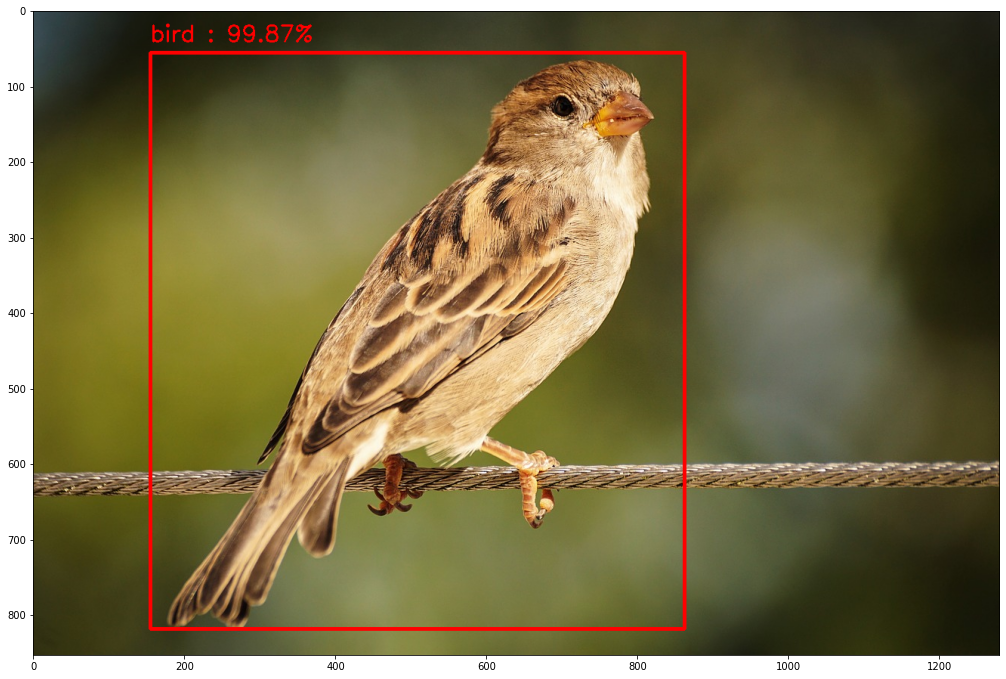

In [56]:
img_file = 'sparrow_1280.jpg'
img=cv2.imread(img_file)
img.shape

h,w = img.shape[:2]

blob=cv2.dnn.blobFromImage(img, 0.007843, (300,300),127.5)
net.setInput(blob)
objects=net.forward() # 입력->출력 검출
CONFIDENCE_TH = 0.5

for i in range(0, objects.shape[2]):
    confidence=objects[0,0,i,2] # 예측 정확률?
    if confidence>CONFIDENCE_TH: # 정확률이 50% 이상이면
        class_idx=int(objects[0,0,i,1]) # 클래스 인덱스를 저장 이 예제는 새 사진이므로 클래스는 3
        box=objects[0,0,i,3:7]*np.array([w,h,w,h]) # 물체를 인식하는 네 점의 좌표를 저장
        (startX, startY, endX, endY) = box.astype('int') # 네 점의 좌표를 float -> int로 변환
        cv2.rectangle(img, (startX, startY),(endX, endY), bbox_colors,3) # 네 점의 좌표로 사각형을 그림
        
        y=startY-15 if startY-15 > 15 else startY+15
        label=f'{classes[class_idx]} : {confidence*100:.2f}%'
        cv2.putText(img, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 1., bbox_colors,2 )

sf=1/plt.rcParams['figure.dpi']
plt.figure(figsize=(img.shape[1]*sf, img.shape[0]*sf))
plt.imshow(img[...,::-1])

### 2.3

결과 영상을 OpenCV window에서 볼 수 있도록 예제 2.1에서 만든 프로그램을 수정하라. 단, window 크기를 마우스로 변경할 수 있어야 한다.

In [36]:
img_file = 'sparrow_1280.jpg'
img=cv2.imread(img_file)
img.shape

h,w = img.shape[:2]
blob=cv2.dnn.blobFromImage(img, 0.007843, (300,300),127.5)
net.setInput(blob)
objects=net.forward() # 입력->출력 검출

CONFIDENCE_TH = 0.5

for i in range(0, objects.shape[2]):
    confidence=objects[0,0,i,2]
    if confidence>CONFIDENCE_TH:
        class_idx=int(objects[0,0,i,1])
        box=objects[0,0,i,3:7]*np.array([w,h,w,h])
        (startX, startY, endX, endY) = box.astype('int')
        cv2.rectangle(img, (startX, startY),(endX, endY), bbox_colors,3)
        
        y=startY-15 if startY-15 > 15 else startY+15
        label=f'{classes[class_idx]} : {confidence*100:.2f}%'
        cv2.putText(img, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 1., bbox_colors,2 )

cv2.imshow('object detect',img)
cv2.waitKey()
cv2.destroyAllWindows()

### 예제 2.4

무료 영상을 내려받을 수 있는 사이트에서 적당한 영상 파일을 3 개 이상 내려 받은 후에 위에서 만든 프로그램을 적용한 결과를 표시하라.

pixabay.com
pexels.com

영상에 categories가 포함된 영상을 인식

In [44]:
video_file_name = 'cars_video.mp4' 
cap = cv2.VideoCapture()
cap.open(video_file_name) # 비디오 파일 가져오기

ret, frame = cap.read()
frame.shape[:2]

(720, 1280)

In [78]:
import cv2
import numpy as np

# List of categories and classes
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 
               4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
               9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 
              13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 
              19: 'train', 20: 'tvmonitor'}
 
classes =  [v for v in categories.values()]

bbox_colors = (0,0,255) # 사각형 색

PROTOTXT = "MobileNetSSD_deploy.prototxt"
MODEL = "MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL) # dnn : deep neural network

video_file_name = 'cars_video2.mp4' 
cap = cv2.VideoCapture()
cap.open(video_file_name) # 비디오 파일 가져오기

winName = 'car detection'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)

ret, frame = cap.read() # 영상의 프레임을 저장

if ret:
    h,w = frame.shape[:2] # 720, 1280
    blob=cv2.dnn.blobFromImage(frame, 0.007843, (300,300),127.5)
    net.setInput(blob)
    objects=net.forward() # 입력->출력 검출

    CONFIDENCE_TH = 0.5

    for i in range(0, objects.shape[2]):
        confidence=objects[0,0,i,2]# 예측 정확률
        if confidence>CONFIDENCE_TH: # 정확률이 50%보다 높으면
            class_idx=int(objects[0,0,i,1]) # 예측한 클래스가 어떤 클래스인지 저장
            box=objects[0,0,i,3:7]*np.array([w,h,w,h]) # 물체를 인식하는 네 점의 좌표를 저장
            (startX, startY, endX, endY) = box.astype('int') # 네 점의 좌표를 float -> int 변환
            cv2.rectangle(frame, (startX, startY),(endX, endY), bbox_colors,3) # 물체를 인식하는 사각형을 그림
                
            y=startY-15 if startY-15 > 15 else startY+15
            label=f'{classes[class_idx]} : {confidence*100:.2f}%'
            cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 1., bbox_colors,2 )
            cv2.imshow(winName, frame)
        
        else:
            cap.release()
            break
cv2.waitKey()
cv2.destroyAllWindows()




In [41]:
classes

['background',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

## 문제 1.

예제 2를 수정하여 동영상에 적용하여 동영상에 각 프레임에 검출된 객체를 표시한 후에 동영상을 재생하는 프로그램으로 변경하라.

In [24]:
import cv2
import numpy as np

# List of categories and classes
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 
               4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
               9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 
              13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 
              19: 'train', 20: 'tvmonitor'}
 
classes =  [v for v in categories.values()]

bbox_colors = (0,0,255) # 사각형 색

PROTOTXT = "MobileNetSSD_deploy.prototxt"
MODEL = "MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL) # dnn : deep neural network

video_file_name = 'cars_video2.mp4' 
cap = cv2.VideoCapture()
cap.open(video_file_name) # 비디오 파일 가져오기

winName = 'car detection'
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE|cv2.WINDOW_GUI_NORMAL)

while True:
    ret, frame = cap.read() # 영상의 프레임을 저장

    if ret:
        h,w = frame.shape[:2] # 720, 1280
        blob=cv2.dnn.blobFromImage(frame, 0.007843, (300,300),127.5)
        net.setInput(blob)
        objects=net.forward() # 입력->출력 검출

        CONFIDENCE_TH = 0.5

        for i in range(0, objects.shape[2]):
            confidence=objects[0,0,i,2]# 예측 정확률
            if confidence>CONFIDENCE_TH: # 정확률이 50%보다 높으면
                class_idx=int(objects[0,0,i,1]) # 예측한 클래스가 어떤 클래스인지 저장
                box=objects[0,0,i,3:7]*np.array([w,h,w,h]) # 물체를 인식하는 네 점의 좌표를 저장
                (startX, startY, endX, endY) = box.astype('int') # 네 점의 좌표를 float -> int 변환
                cv2.rectangle(frame, (startX, startY),(endX, endY), bbox_colors,3) # 물체를 인식하는 사각형을 그림
                
                y=startY-15 if startY-15 > 15 else startY+15
                label=f'{classes[class_idx]} : {confidence*100:.2f}%'
                cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 1., bbox_colors,2 )
        cv2.imshow(winName, frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    else:
        cap.release()
        break

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
# 카메라를 이용한 얼굴 인식 프로그램

import cv2
import numpy as np

def detect_face():
    global classfier, frame, ret, frame2
    faces=classfier.detectMultiScale(frame,minSize=(30,30),minNeighbors=1,scaleFactor=2)
    if len(faces): # faces length가 1이상이면
        frame2 = frame.copy()
        for (x,y,w,h) in faces:
            cv2.rectangle(frame2, (x,y),(x+w,y+h), color=(0,0,255), thickness=3)
    cv2.imshow(winName, frame2)
    
winName = 'Face Detection'

classfier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cv2.namedWindow(winName, flags=cv2.WINDOW_AUTOSIZE | cv2.WINDOW_GUI_NORMAL)

cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 500) # 영상 프레임 사이즈
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 300)

if cap.isOpened():
    ret, frame = cap.read()
    frame2 = frame.copy()

    cv2.imshow(winName, frame)

    while ret:
        ret, frame = cap.read()
        detect_face()
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()